# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&APPID=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahibadhoo
Processing Record 2 of Set 1 | severo-yeniseyskiy
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | zhanaozen
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | fairmount
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | hailar
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | likiep
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | waitangi
Proc

City not found. Skipping...
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | broken hill
Processing Record 39 of Set 4 | woolgoolga
Processing Record 40 of Set 4 | bechar
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | jhinjhak
Processing Record 43 of Set 4 | mersa matruh
Processing Record 44 of Set 4 | berezovyy
Processing Record 45 of Set 4 | goba
Processing Record 46 of Set 4 | mastung
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | coyhaique
Processing Record 49 of Set 4 | talcahuano
Processing Record 0 of Set 5 | chonchi
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | kerikeri
Processing Record 3 of Set 5 | brookings
Processing Record 4 of Set 5 | najran
Processing Record 5 of Set 5 | ar rudayyif
Processing Record 6 of Set 5 | bam
Processing Record 7 of Set 5 | tarko-sale
Processing Record 8 of Set 5 | tekkali
Processing Record 9 of Set 5 | mount pearl
Processing Record 10 of Set 5 | punta a

Processing Record 32 of Set 8 | maumere
Processing Record 33 of Set 8 | lesosibirsk
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | opp
Processing Record 36 of Set 8 | aripuana
Processing Record 37 of Set 8 | borgo san dalmazzo
Processing Record 38 of Set 8 | daru
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | mugia
Processing Record 42 of Set 8 | viligili
City not found. Skipping...
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | acarau
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | timbiqui
Processing Record 47 of Set 8 | huanggang
Processing Record 48 of Set 8 | karamay
City not found. Skipping...
Processing Record 49 of Set 8 | rio grande
Processing Record 0 of Set 9 | nuku'alofa
Processing Record 1 of Set 9 | uglich
Processing Record 2 of Set 9 | hihifo
City not found. Skipping...
Processing Record 3 of Set 9 | saurimo
Processing Rec

Processing Record 19 of Set 12 | chokwe
Processing Record 20 of Set 12 | burao
Processing Record 21 of Set 12 | fort st. john
Processing Record 22 of Set 12 | rakops
Processing Record 23 of Set 12 | albertina
Processing Record 24 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 25 of Set 12 | saint george's
Processing Record 26 of Set 12 | alotau
City not found. Skipping...
Processing Record 27 of Set 12 | nar'yan-mar
Processing Record 28 of Set 12 | zouerate
Processing Record 29 of Set 12 | naryn
Processing Record 30 of Set 12 | borogontsy
Processing Record 31 of Set 12 | mount gambier
Processing Record 32 of Set 12 | fallon
Processing Record 33 of Set 12 | robore
Processing Record 34 of Set 12 | tomatlan
Processing Record 35 of Set 12 | sayre
Processing Record 36 of Set 12 | takamaka
City not found. Skipping...
Processing Record 37 of Set 12 | trincomalee
Processing Record 38 of Set 12 | strezhevoy
Processing Record 39 of Set 12 | vetluga
Processing Record 4

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#change kelvin to celcius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahibadhoo,3.7833,72.9667,28.29,69,100,0.82,MV,1681940189
1,severo-yeniseyskiy,60.3725,93.0408,-18.27,100,97,2.00,RU,1681940190
2,puerto natales,-51.7236,-72.4875,8.69,78,73,7.72,CL,1681940191
3,port-aux-francais,-49.3500,70.2167,4.74,66,32,15.82,TF,1681940192
4,wailua homesteads,22.0669,-159.3780,26.18,66,75,3.09,US,1681939995


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,28.29,69,100,0.82,MV,1681940189
1,severo-yeniseyskiy,60.3725,93.0408,-18.27,100,97,2.00,RU,1681940190
2,puerto natales,-51.7236,-72.4875,8.69,78,73,7.72,CL,1681940191
3,port-aux-francais,-49.3500,70.2167,4.74,66,32,15.82,TF,1681940192
4,wailua homesteads,22.0669,-159.3780,26.18,66,75,3.09,US,1681939995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

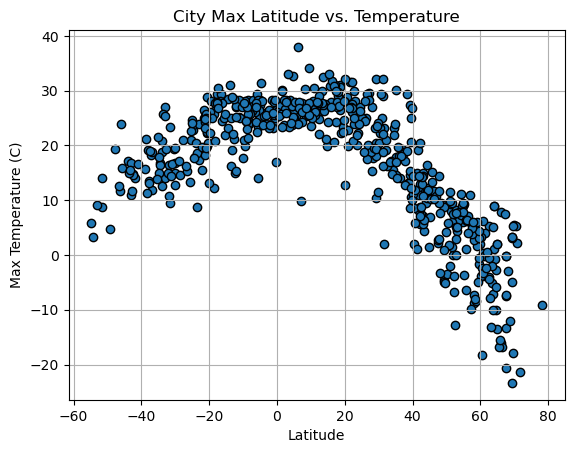

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

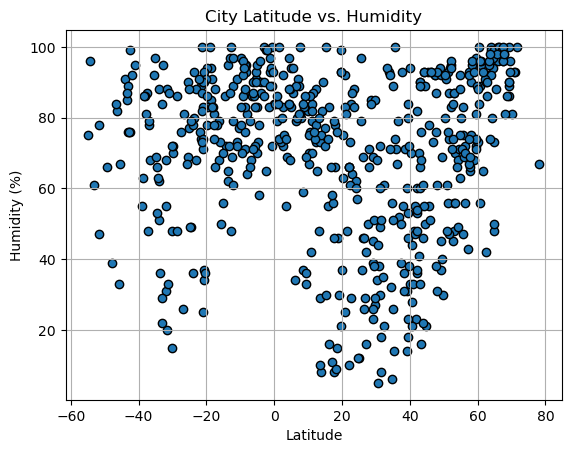

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

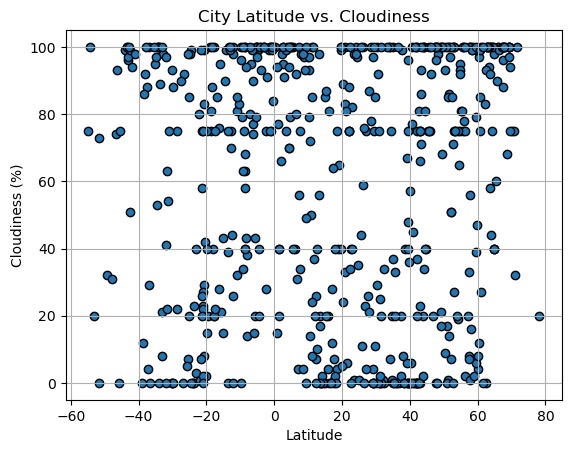

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

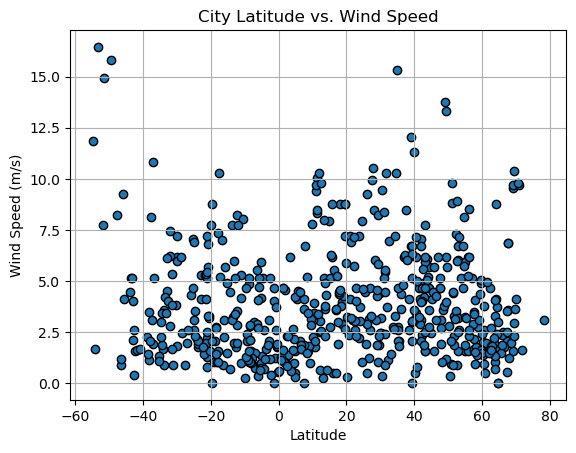

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def lin_reg(x, y, ylab, loc):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    model = (x * slope) + intercept

    plt.scatter(x, y)
    plt.plot(x, model, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylab)
    plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}",loc,fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,28.29,69,100,0.82,MV,1681940189
1,severo-yeniseyskiy,60.3725,93.0408,-18.27,100,97,2.00,RU,1681940190
4,wailua homesteads,22.0669,-159.3780,26.18,66,75,3.09,US,1681939995
5,zhanaozen,43.3000,52.8000,12.31,16,93,7.74,KZ,1681940192
7,stanley,54.8680,-1.6985,6.05,92,75,1.54,GB,1681940143


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,8.69,78,73,7.72,CL,1681940191
3,port-aux-francais,-49.3500,70.2167,4.74,66,32,15.82,TF,1681940192
6,invercargill,-46.4000,168.3500,11.68,82,93,0.89,NZ,1681940138
8,afaahiti,-17.7500,-149.2833,29.48,81,100,7.34,PF,1681940194
10,blackmans bay,-43.0167,147.3167,10.96,76,96,3.99,AU,1681940197


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7673265646018408


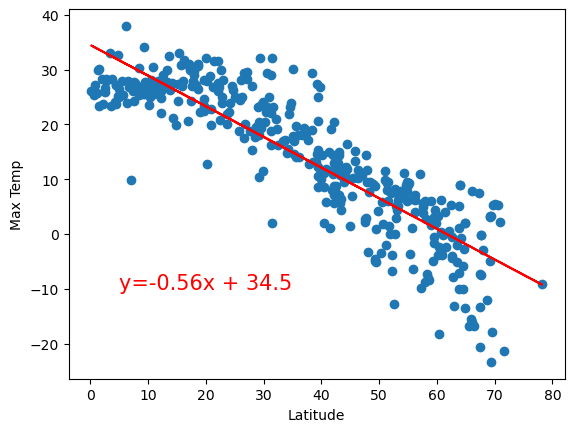

In [88]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (5,-10))

The r-value is: 0.5111047541144941


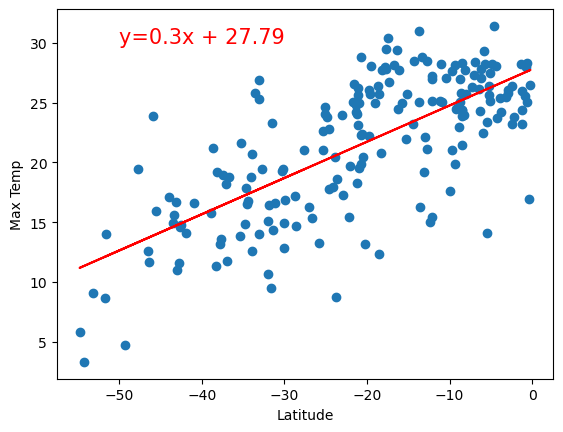

In [89]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-50,30))

**Discussion about the linear relationship:** The northern hemisphere has a negative relationship (as latitude increases, temperature decreases) while the southern hemisphere has a postive relationship (as latitude increases, temperature increases). This makes sense because the equator is at latitude 0, so cities near the equator have higher temperatures than ones near either pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04595753414929724


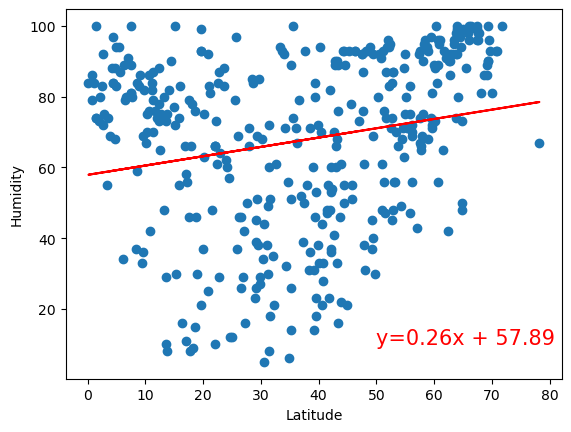

In [90]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", (50,10))

The r-value is: 0.09079928082916044


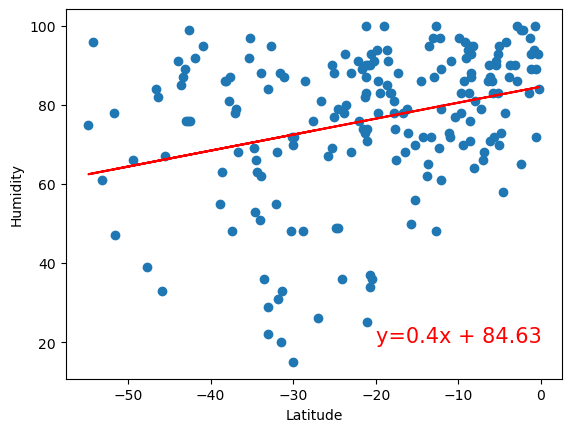

In [91]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", (-20,20))

**Discussion about the linear relationship:** For both hemispheres, there is not a strong linear relationship between latitude and humidity since the r-values for both are close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018686787683063262


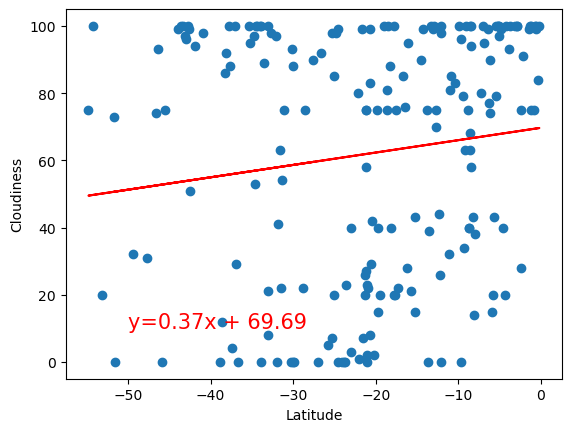

In [95]:
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", (-50,10))

The r-value is: 0.024026517125811015


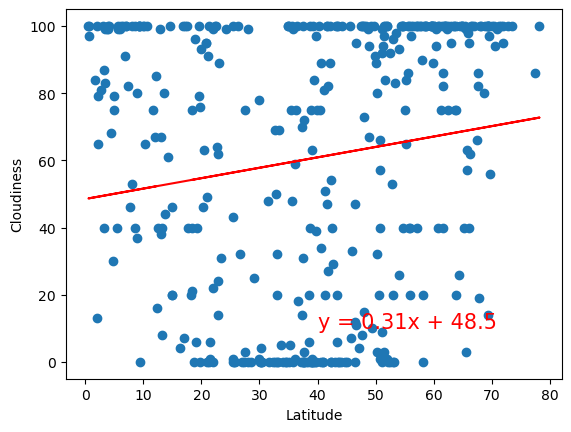

In [19]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness", (50,10))

The r-value is: 0.018686787683063262


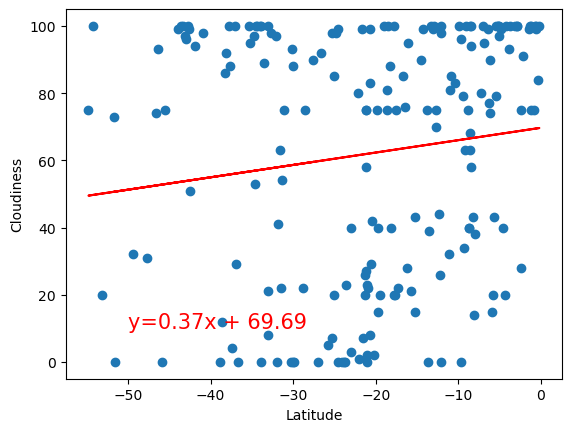

In [96]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", (-50,10))

**Discussion about the linear relationship:** The r-values for both hemispheres are close to 0 so there is not a strong linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001565716316862433


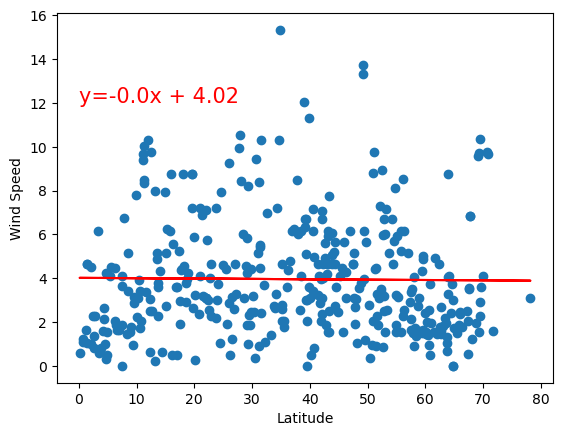

In [97]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", (0,12))

The r-value is: 0.11053498417272112


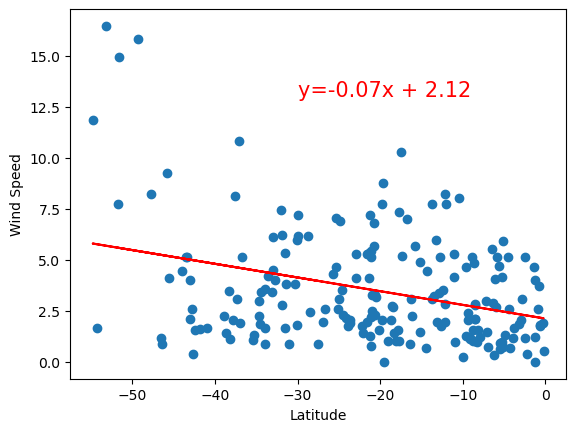

In [99]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", (-30,13))

**Discussion about the linear relationship:** Like with humidity and cloudiness, latitude and wind speed does not have a strong linear relationship for both hemispheres since r-values are close to 0.